### 株価予測

In [1]:
import pandas as pd
import numpy as np

In [40]:
#データの読み込み
df=pd.read_csv('train.csv')
df.head()

,Date,Open,High,Low,Close,Up
0,2004-01-02,50.85,50.91,50.62,50.72,1
1,2004-01-05,50.75,50.84,50.61,50.79,1
2,2004-01-06,50.87,51.26,50.86,51.15,1
3,2004-01-07,51.45,51.54,51.29,51.51,0
4,2004-01-08,51.15,51.33,51.02,51.28,0


In [23]:
df.shape

(2026, 6)

In [24]:
test=pd.read_csv('test.csv')
test.head()

,Date,Open,High,Low,Close
0,2012-01-19,110.79,110.82,109.96,110.39
1,2012-01-20,110.45,111.10,110.36,110.73
2,2012-01-23,110.95,111.10,109.65,110.36
3,2012-01-24,110.16,110.16,108.13,108.39
4,2012-01-25,106.25,107.11,105.97,106.89


In [25]:
test.shape

(1200, 5)

In [26]:
sample_submission=pd.read_csv('sample_submission.csv')
sample_submission.head()

,2012-01-26,0
0,2012-02-09,0
1,2012-02-24,0
2,2012-03-09,0
3,2012-03-23,0
4,2012-04-09,0


In [27]:
sample_submission.shape

(199, 2)

# データ前処理
### 目的変数の追加

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2026 non-null   object 
 1   Open    2026 non-null   float64
 2   High    2026 non-null   float64
 3   Low     2026 non-null   float64
 4   Close   2026 non-null   float64
 5   Up      2026 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 95.1+ KB


In [29]:
#Dateのデータ型をdatetime64に変更
df['Date']=pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2026 non-null   datetime64[ns]
 1   Open    2026 non-null   float64       
 2   High    2026 non-null   float64       
 3   Low     2026 non-null   float64       
 4   Close   2026 non-null   float64       
 5   Up      2026 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 95.1 KB


In [30]:
#曜日変数の追加
df['weekday']=df['Date'].dt.weekday
df.head()

,Date,Open,High,Low,Close,Up,weekday
0,2004-01-02,50.85,50.91,50.62,50.72,1,4
1,2004-01-05,50.75,50.84,50.61,50.79,1,0
2,2004-01-06,50.87,51.26,50.86,51.15,1,1
3,2004-01-07,51.45,51.54,51.29,51.51,0,2
4,2004-01-08,51.15,51.33,51.02,51.28,0,3


In [33]:
#テストデータも同様に操作
test['Date']=pd.to_datetime(test['Date'])
test['weekday']=test['Date'].dt.weekday
df_test.head()

,Date,Open,High,Low,Close
0,2012-01-19,110.79,110.82,109.96,110.39
1,2012-01-20,110.45,111.10,110.36,110.73
2,2012-01-23,110.95,111.10,109.65,110.36
3,2012-01-24,110.16,110.16,108.13,108.39
4,2012-01-25,106.25,107.11,105.97,106.89


In [34]:
from datetime import datetime
from datetime import timedelta
start = datetime(2004,1,2)
df['weeks']=(df['Date']-start)//timedelta(weeks=1)
df.head()

,Date,Open,High,Low,Close,Up,weekday,weeks
0,2004-01-02,50.85,50.91,50.62,50.72,1,4,0
1,2004-01-05,50.75,50.84,50.61,50.79,1,0,0
2,2004-01-06,50.87,51.26,50.86,51.15,1,1,0
3,2004-01-07,51.45,51.54,51.29,51.51,0,2,0
4,2004-01-08,51.15,51.33,51.02,51.28,0,3,0


In [35]:
df = df[['Date','weeks','weekday','High','Low','Open','Close','Up']]
df.head()

,Date,weeks,weekday,High,Low,Open,Close,Up
0,2004-01-02,0,4,50.91,50.62,50.85,50.72,1
1,2004-01-05,0,0,50.84,50.61,50.75,50.79,1
2,2004-01-06,0,1,51.26,50.86,50.87,51.15,1
3,2004-01-07,0,2,51.54,51.29,51.45,51.51,0
4,2004-01-08,0,3,51.33,51.02,51.15,51.28,0


### データの全体像をつかむ

<AxesSubplot: >

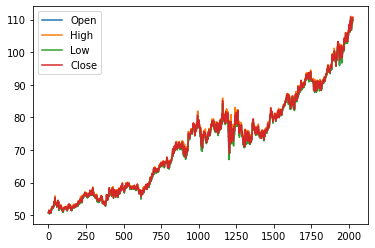

In [36]:
df_new=df[['Open','High','Low','Close']]

from matplotlib import pyplot as plt
%matplotlib inline

df_new.plot(kind='line')

### 学習データと検証データに分割

In [37]:
df

,Date,weeks,weekday,High,Low,Open,Close,Up
0,2004-01-02,0,4,50.91,50.62,50.85,50.72,1
1,2004-01-05,0,0,50.84,50.61,50.75,50.79,1
2,2004-01-06,0,1,51.26,50.86,50.87,51.15,1
3,2004-01-07,0,2,51.54,51.29,51.45,51.51,0
4,2004-01-08,0,3,51.33,51.02,51.15,51.28,0
...,...,...,...,...,...,...,...,...
2021,2012-01-11,418,2,109.00,108.41,108.62,108.86,1
2022,2012-01-12,418,3,109.90,109.44,109.68,109.83,0
2023,2012-01-13,419,4,109.72,109.08,109.53,109.66,1
2024,2012-01-17,419,1,110.47,109.57,109.99,109.96,1


In [91]:
df_train=df['2004-01-02':'2020-12-31']
df_train.tail()

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2020-12-21,0,2.488774e+06,2.454361e+06,2.482154e+06,2.471084e+06,-0.001830,11070.371094,0
2020-12-22,1,2.464199e+06,2.438454e+06,2.456738e+06,2.445366e+06,-0.010407,11371.899414,1
2020-12-23,2,2.459132e+06,2.443363e+06,2.458690e+06,2.453543e+06,0.003344,5146.757812,1
2020-12-24,3,2.475719e+06,2.460987e+06,2.463748e+06,2.466822e+06,0.005412,-3074.721680,0
2020-12-25,4,2.471286e+06,2.464041e+06,2.470499e+06,2.465736e+06,-0.000440,4762.846680,1


In [92]:
df_val=df['2021-01-01':]
df_val.tail()

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-10-11,0,2.643776e+06,2.580132e+06,2.587925e+06,2.636083e+06,0.016017,-48158.173828,0
2021-10-12,1,2.633371e+06,2.605390e+06,2.632446e+06,2.611331e+06,-0.009390,21115.112305,0
2021-10-13,2,2.623762e+06,2.589395e+06,2.597903e+06,2.602976e+06,-0.003200,-5072.685547,1
2021-10-14,3,2.643343e+06,2.611646e+06,2.614458e+06,2.640961e+06,0.014593,-26503.056641,1
2021-10-15,4,2.690117e+06,2.657175e+06,2.662822e+06,2.688848e+06,0.018133,-26026.826172,0


In [93]:
x_train=df_train[['weekday','High','Low','Open','Close','Close_ratio','Body']]
y_train=df_train['Up']


In [94]:
x_val=df_val[['weekday','High','Low','Open','Close','Close_ratio','Body']]
y_val=df_val['Up']

#print(x_val)
#print(y_val)